In [198]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [199]:
train_df = pd.read_excel('Data_Train.xlsx')
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [200]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [201]:
train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [202]:
train_df.dropna(inplace=True)
train_df[train_df.duplicated()].head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303


In [203]:
train_df.drop_duplicates(keep='first',inplace=True)
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [204]:
print(train_df.shape)

(10462, 11)


In [205]:
print(train_df['Airline'].unique())
print(train_df['Source'].unique())

['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']


In [206]:
test_df = pd.read_excel("Test_set.xlsx")
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [207]:
test_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

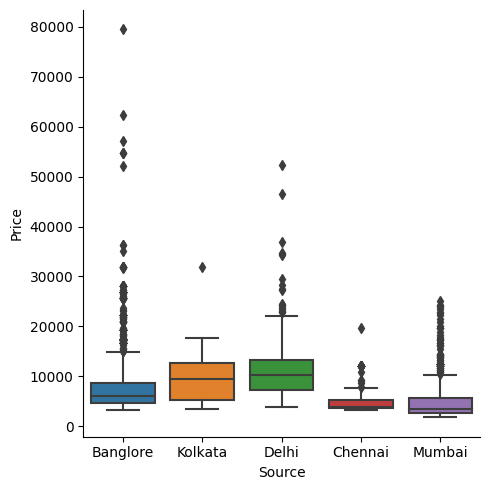

In [208]:
import seaborn as sns
sns.catplot(data=train_df,x ='Source',y='Price',kind='box')

In [209]:
train_df['Duration'] = train_df['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)
test_df['Duration'] = test_df['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [210]:
train_df["Journey_day"] = train_df['Date_of_Journey'].str.split('/').str[0].astype(int)
train_df["Journey_month"] = train_df['Date_of_Journey'].str.split('/').str[1].astype(int)
train_df.drop(["Date_of_Journey"], axis = 1, inplace = True)

train_df["Dep_hour"] = pd.to_datetime(train_df["Dep_Time"]).dt.hour
train_df["Dep_min"] = pd.to_datetime(train_df["Dep_Time"]).dt.minute
train_df.drop(["Dep_Time"], axis = 1, inplace = True)

train_df["Arrival_hour"] = pd.to_datetime(train_df.Arrival_Time).dt.hour
train_df["Arrival_min"] = pd.to_datetime(train_df.Arrival_Time).dt.minute
train_df.drop(["Arrival_Time"], axis = 1, inplace = True)

In [211]:
test_df["Journey_day"] = test_df['Date_of_Journey'].str.split('/').str[0].astype(int)
test_df["Journey_month"] = test_df['Date_of_Journey'].str.split('/').str[1].astype(int)
test_df.drop(["Date_of_Journey"], axis = 1, inplace = True)

test_df["Dep_hour"] = pd.to_datetime(test_df["Dep_Time"]).dt.hour
test_df["Dep_min"] = pd.to_datetime(test_df["Dep_Time"]).dt.minute
test_df.drop(["Dep_Time"], axis = 1, inplace = True)

test_df["Arrival_hour"] = pd.to_datetime(test_df.Arrival_Time).dt.hour
test_df["Arrival_min"] = pd.to_datetime(test_df.Arrival_Time).dt.minute
test_df.drop(["Arrival_Time"], axis = 1, inplace = True)

In [212]:
train_df = train_df.drop(['Route','Additional_Info','Route','Airline','Duration'],axis=1)
test_df = test_df.drop(['Route','Additional_Info','Route','Airline','Duration'],axis=1)

In [213]:
train_df.head()

,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10
1,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15
2,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25
3,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30
4,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35


In [214]:
test_df.head()

,Source,Destination,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,Delhi,Cochin,1 stop,6,6,17,30,4,25
1,Kolkata,Banglore,1 stop,12,5,6,20,10,20
2,Delhi,Cochin,1 stop,21,5,19,15,19,0
3,Delhi,Cochin,1 stop,21,5,8,0,21,0
4,Banglore,Delhi,non-stop,24,6,23,55,2,45


In [215]:
train_df = train_df.drop(['Total_Stops'],axis=1)
test_df = test_df.drop(['Total_Stops'],axis=1)

In [216]:
data = train_df.drop(['Price'],axis=1)
data.head(2)

,Source,Destination,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,Banglore,New Delhi,24,3,22,20,1,10
1,Kolkata,Banglore,1,5,5,50,13,15


In [217]:
train_categorical_data = data.select_dtypes(exclude=['int64', 'float','int32'])
train_numerical_data = data.select_dtypes(include=['int64', 'float','int32'])

test_categorical_data = test_df.select_dtypes(exclude=['int64', 'float','int32','int32'])
test_numerical_data  = test_df.select_dtypes(include=['int64', 'float','int32'])

In [218]:
from sklearn.preprocessing import LabelEncoder

train_cat = train_categorical_data.apply(LabelEncoder().fit_transform)
test_cat = test_categorical_data.apply(LabelEncoder().fit_transform)

In [219]:
train_cat.head()

,Source,Destination
0,0,5
1,3,0
2,2,1
3,3,0
4,0,5


In [220]:
X = pd.concat([train_cat,train_numerical_data],axis=1)
y = train_df['Price']
test_set = pd.concat([test_cat,test_numerical_data],axis=1)
X.head()

,Source,Destination,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,0,5,24,3,22,20,1,10
1,3,0,1,5,5,50,13,15
2,2,1,9,6,9,25,4,25
3,3,0,12,5,18,5,23,30
4,0,5,1,3,16,50,21,35


In [221]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
print(X_train.shape)
print(y_train.shape)

(7323, 8)
(7323,)


In [244]:
from sklearn.metrics import mean_squared_error as mse
from math import sqrt

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [223]:
params = {'alpha':[0.0001,0.001,0.01,0.1,1,10,100,1000,10000,100000]}
ridge_regression = GridSearchCV(
    Ridge(),
    params,
    cv=5,
    scoring = 'neg_mean_absolute_error',
    n_jobs=-1
)
ridge_regression.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             scoring='neg_mean_absolute_error')

In [224]:
y_train_pred = ridge_regression.predict(X_train)
y_test_pred = ridge_regression.predict(X_test)

In [225]:
print('Mean squared absolute error: {}'.format(sqrt(mse(y_test,y_test_pred))))

Mean squared absolute error: 4521.061260325948


In [226]:
lasso_regression = GridSearchCV(
    Lasso(),
    params,
    cv=15,
    scoring = 'neg_mean_absolute_error',
    n_jobs=-1
)
lasso_regression.fit(X_train,y_train)

GridSearchCV(cv=15, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             scoring='neg_mean_absolute_error')

In [227]:
y_train_pred = lasso_regression.predict(X_train)
y_test_pred = lasso_regression.predict(X_test)
print("Mean squared absolute error: {}".format(sqrt(mse(y_test,y_test_pred))))

Mean squared absolute error: 4521.061261097854


In [259]:
depth = np.array(range(3,30))
param_grid = dict(max_depth = depth)
decision_tree = GridSearchCV(
    DecisionTreeRegressor(),
    param_grid,
    cv=10
)
decision_tree.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [260]:
y_train_pred = decision_tree.predict(X_train)
y_test_pred = decision_tree.predict(X_test)
print("Mean squared absolute error: {}".format(sqrt(mse(y_test,y_test_pred))))

Mean squared absolute error: 2903.1629570314226


In [254]:
# params = {'C':[0.001,0.01,0.1,1,10,100,1000],
#           'penalty':['l1','l2'],
#           'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
#           'max_iter':list(range(100,800,100))}
# logistic_regression = GridSearchCV(LogisticRegression(),params,refit=True,cv=5)
# logistic_regression.fit(X_train,y_train)

In [266]:
param_grid = { 
            "n_estimators":[10,20,30],
            "max_features":["auto", "sqrt", "log2"],
            "min_samples_split":[2,4,8],
            "bootstrap":[True, False],
            }
random_forest = GridSearchCV(RandomForestRegressor(),param_grid,n_jobs=-1,cv=5)
random_forest.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [10, 20, 30]})

In [267]:
ridge_score = round(ridge_regression.score(X_train, y_train) * 100, 2)
ridge_score_test = round(ridge_regression.score(X_test, y_test) * 100, 2)

lasso_score = round(lasso_regression.score(X_train, y_train) * 100, 2)
lasso_score_test = round(lasso_regression.score(X_test, y_test) * 100, 2)

decision_score = round(decision_tree.score(X_train, y_train) * 100, 2)
decision_score_test = round(decision_tree.score(X_test, y_test) * 100, 2)

random_score = round(random_forest.score(X_train, y_train) * 100, 2)
random_score_test = round(random_forest.score(X_test, y_test) * 100, 2)

In [268]:
model = pd.DataFrame({
    'Model': [ 'Ridge Regression', 'Lasso Regression','Decision Tree Regressor','Random Forest Regressor'],
    'Score': [ ridge_score, lasso_score, decision_score,random_score],
    'Test Score': [ ridge_score_test, lasso_score_test, decision_score_test,random_score_test]
})
model.sort_values(by='Test Score',ascending=False)

,Model,Score,Test Score
3,Random Forest Regressor,90.58,74.04
2,Decision Tree Regressor,87.30,61.70
0,Ridge Regression,-347932.78,-355274.50
1,Lasso Regression,-347932.78,-355274.50


In [269]:
for i in train_df.columns[5:]:
    print(f"{i}'s min:{train_df[i].min()}")
    print(f"{i}'s max:{train_df[i].max()}")

Dep_hour's min:0
Dep_hour's max:23
Dep_min's min:0
Dep_min's max:55
Arrival_hour's min:0
Arrival_hour's max:23
Arrival_min's min:0
Arrival_min's max:55


In [279]:
import sklearn
def Predict(model,
            Source:str=None,
            Destination:str=None,
            Journey_day:int=None,
            Journey_month:int=None,
            Dep_hour:int=np.random.randint(0,23),
            Dep_min:int=np.random.randint(0,55),
            Arrival_hour:int=np.random.randint(0,23),
            Arrival_min:int=np.random.randint(0,55)
            ):
    if(Source==None and Destination == None and Journey_day == None and Journey_month == None):
        return "Make sure to give all the inputs..I'm not sure about the price with given data"
    raw_data = np.array([Source,Destination,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min]).reshape(1,8)
    raw_data_conv = pd.DataFrame(raw_data,columns=['Source', 'Destination', 'Journey_day', 'Journey_month', 'Dep_hour','Dep_min', 'Arrival_hour', 'Arrival_min'])
    categorical_data = raw_data_conv.select_dtypes(exclude=['int64', 'float','int32'])
    numerical_data = raw_data_conv.select_dtypes(include=['int64', 'float','int32'])
    
    cat = categorical_data.apply(LabelEncoder().fit_transform)
    X = pd.concat([cat,numerical_data],axis=1)

    
    pred = model.predict(X)
    
    return 'by the given data, It will cost you around {} ₹'.format(round(pred[0]))

In [271]:
train_df

,Source,Destination,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,Banglore,New Delhi,3897,24,3,22,20,1,10
1,Kolkata,Banglore,7662,1,5,5,50,13,15
2,Delhi,Cochin,13882,9,6,9,25,4,25
3,Kolkata,Banglore,6218,12,5,18,5,23,30
4,Banglore,New Delhi,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...
10678,Kolkata,Banglore,4107,9,4,19,55,22,25
10679,Kolkata,Banglore,4145,27,4,20,45,23,20
10680,Banglore,Delhi,7229,27,4,8,20,11,20
10681,Banglore,New Delhi,12648,1,3,11,30,14,10


In [278]:
Predict(random_forest,'Bangalore','Delhi',12,3)

'by the given data, It will cost you around 10576₹'

In [236]:
decision_tree.predict(X_test)

array([12878.08333333,  6426.        ,  5882.52631579, ...,
       10370.72727273, 12835.13333333, 13387.        ])